### Data pre-processing

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
import pickle

In [96]:
# Read the datasets
DIR = '/content/drive/MyDrive/Competition/2023/HeatStroke/'
train = pd.read_csv(DIR + 'Train/Train2021.csv')
test = pd.read_csv(DIR + 'Test/Test Data.csv')
train.shape, test.shape

((81214, 69), (35697, 69))

In [97]:
# train.experiment.unique()

In [98]:
# Check whether there are same number of columns in both datasets
assert train.shape[-1] == test.shape[-1]

In [99]:
train.columns

Index(['id', 'datetime', 'num_ibis', 'hrv_mean_nni', 'hrv_median_nni',
       'hrv_range_nni', 'hrv_sdsd', 'hrv_rmssd', 'hrv_nni_50', 'hrv_pnni_50',
       'hrv_nni_20', 'hrv_pnni_20', 'hrv_cvsd', 'hrv_sdnn', 'hrv_cvnni',
       'hrv_mean_hr', 'hrv_min_hr', 'hrv_max_hr', 'hrv_std_hr',
       'hrv_total_power', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_lf_hf_ratio',
       'hrv_lfnu', 'hrv_hfnu', 'hrv_SD1', 'hrv_SD2', 'hrv_SD2SD1', 'hrv_CSI',
       'hrv_CVI', 'hrv_CSI_Modified', 'hrv_mean', 'hrv_std', 'hrv_min',
       'hrv_max', 'hrv_ptp', 'hrv_sum', 'hrv_energy', 'hrv_skewness',
       'hrv_kurtosis', 'hrv_peaks', 'hrv_rms', 'hrv_lineintegral',
       'hrv_n_above_mean', 'hrv_n_below_mean', 'hrv_n_sign_changes', 'hrv_iqr',
       'hrv_iqr_5_95', 'hrv_pct_5', 'hrv_pct_95', 'hrv_entropy',
       'hrv_perm_entropy', 'hrv_svd_entropy', 'experiment', 'subject', 'Task',
       'Room Color', 'Temperature', 'Humidity', 'PMV', 'PDD',
       'Thermal sensation', 'Personal Thermal Assessment', 'Gende

In [100]:
train['Personal Thermal Assessment'].unique(), test['Personal Thermal Assessment'].unique()

(array(['neutral', 'warm', 'hot', 'slightly warm', 'very hot'],
       dtype=object),
 array([0]))

In [101]:
df = train

In [102]:
# Convert the timestamp and sort it
df.datetime = pd.to_datetime(df.datetime)
df.sort_values(by=['datetime', 'id'], inplace = True)
df.datetime.dtypes

datetime64[ns, UTC]

In [103]:
df.Task.unique(), test.Task.unique()

(array(['Radio ', 'Reading', 'Typing'], dtype=object),
 array(['Typing', 'Radio ', 'Reading'], dtype=object))

In [104]:
# Differentiate numerical and catergorical variables
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')
numerical.shape, categorical.shape, df.shape
assert (numerical.shape[1] + categorical.shape[1] == df.shape[1])

In [105]:
assert 'datetime' in numerical.columns

In [106]:
categorical.columns

Index(['experiment', 'subject', 'Task', 'Room Color', 'Thermal sensation',
       'Personal Thermal Assessment', 'Gender'],
      dtype='object')

In [107]:
# Remove subject column as it is not same in both train and test set will create inconsistency in the datasets
categorical.drop(['experiment'], axis = 1, inplace = True)

In [108]:
# convert the categrical variable into numreical varaible, as inverse transform will need for test dataset
LE = {}
cat2num = []
for col in categorical.columns:
    LE[col] = LabelEncoder().fit(categorical[col])
    categorical[col] = LE[col].transform(categorical[col])
categorical

with open('/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Train/LE.pkl', 'wb') as file:
    pickle.dump(LE, file)

In [109]:
df = pd.concat([numerical, categorical], axis = 1).reset_index(drop=True)
df

,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,Age,X_axis,Y_axis,Z_axis,subject,Task,Room Color,Thermal sensation,Personal Thermal Assessment,Gender
0,1,2021-06-22 05:47:01+00:00,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,...,20,-29.78125,45.87500,21.50000,5,0,2,0,1,1
1,1,2021-06-22 05:47:02+00:00,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,...,20,-42.03125,20.53125,-7.18750,5,0,2,0,1,1
2,1,2021-06-22 05:47:03+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,20,-13.75000,51.37500,27.21875,5,0,2,0,1,1
3,1,2021-06-22 05:47:04+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,20,-35.09375,73.31250,-0.65625,5,0,2,0,1,1
4,1,2021-06-22 05:47:05+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,20,-33.18750,55.71875,0.09375,5,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81209,1,2021-09-30 07:36:13+00:00,116,696.659483,664.0625,1171.875,253.448058,253.449369,91.0,78.448276,...,20,-50.71875,-42.12500,-8.43750,6,2,1,2,2,1
81210,1,2021-09-30 07:36:14+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,20,-53.68750,-38.53125,-8.12500,6,2,1,2,2,1
81211,1,2021-09-30 07:36:15+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,20,-54.34375,-37.28125,-8.15625,6,2,1,2,2,1
81212,1,2021-09-30 07:36:16+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,20,-54.03125,-38.00000,-7.93750,6,2,1,2,2,1


In [110]:
# Calculate the time difference among two consecutive data points
df['diff'] = pd.Timedelta('1s')
for i in range(1, df.shape[0]):
    df['diff'][i] = df['datetime'][i] - df['datetime'][i-1]
df

<ipython-input-110-a744b72324bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'][i] = df['datetime'][i] - df['datetime'][i-1]


,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,X_axis,Y_axis,Z_axis,subject,Task,Room Color,Thermal sensation,Personal Thermal Assessment,Gender,diff
0,1,2021-06-22 05:47:01+00:00,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,...,-29.78125,45.87500,21.50000,5,0,2,0,1,1,0 days 00:00:01
1,1,2021-06-22 05:47:02+00:00,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,...,-42.03125,20.53125,-7.18750,5,0,2,0,1,1,0 days 00:00:01
2,1,2021-06-22 05:47:03+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,-13.75000,51.37500,27.21875,5,0,2,0,1,1,0 days 00:00:01
3,1,2021-06-22 05:47:04+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,-35.09375,73.31250,-0.65625,5,0,2,0,1,1,0 days 00:00:01
4,1,2021-06-22 05:47:05+00:00,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,...,-33.18750,55.71875,0.09375,5,0,2,0,1,1,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81209,1,2021-09-30 07:36:13+00:00,116,696.659483,664.0625,1171.875,253.448058,253.449369,91.0,78.448276,...,-50.71875,-42.12500,-8.43750,6,2,1,2,2,1,0 days 00:00:01
81210,1,2021-09-30 07:36:14+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,-53.68750,-38.53125,-8.12500,6,2,1,2,2,1,0 days 00:00:01
81211,1,2021-09-30 07:36:15+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,-54.34375,-37.28125,-8.15625,6,2,1,2,2,1,0 days 00:00:01
81212,1,2021-09-30 07:36:16+00:00,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,...,-54.03125,-38.00000,-7.93750,6,2,1,2,2,1,0 days 00:00:01


In [111]:
# Drop the data with a large time-gap, this may create an inconsistancy among the datapoint after resampling
s, f = 0, 0
dfs = []
for i in range(len(df)):
    if df['diff'][i] > pd.Timedelta('1s'):
        f = i
        dfs.append(df[s:f].reset_index(drop=True))
        # print(s,f)
        s = i+1
dfs.append(df[s:-1].reset_index(drop=True))
# df['diff'][df['diff'] > pd.Timedelta('1s')]

<Axes: xlabel='datetime'>

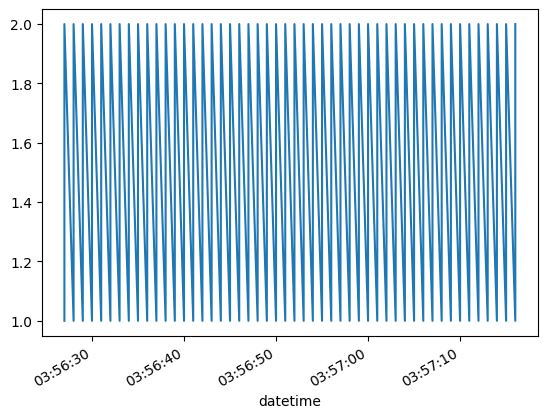

In [112]:
# This is a serious problem, as it may not happen fluctuate at every seconds.
dfs[20].set_index('datetime')['Personal Thermal Assessment'][:100].plot()

In [113]:
# Metigate the issues using backfill technique
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop_duplicates(['datetime'] ).set_index('datetime').resample('1s').bfill()

<Axes: xlabel='datetime'>

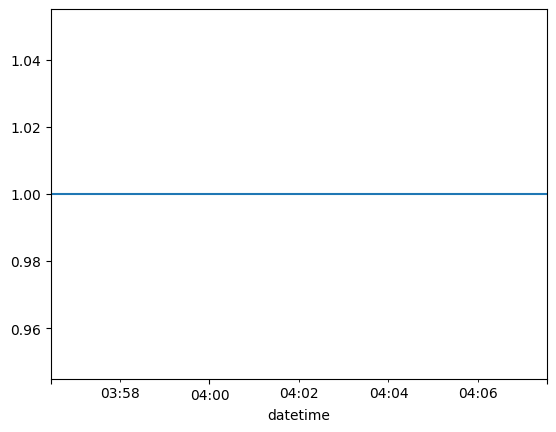

In [114]:
dfs[20]['Personal Thermal Assessment'].plot()

In [115]:
train = pd.concat(dfs)
train

,id,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,...,X_axis,Y_axis,Z_axis,subject,Task,Room Color,Thermal sensation,Personal Thermal Assessment,Gender,diff
datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-22 05:47:01+00:00,1,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,78.0,...,-29.78125,45.87500,21.50000,5,0,2,0,1,1,0 days 00:00:01
2021-06-22 05:47:02+00:00,1,79,883.306962,859.3750,1125.000,349.429723,349.448326,66.0,83.544304,78.0,...,-42.03125,20.53125,-7.18750,5,0,2,0,1,1,0 days 00:00:01
2021-06-22 05:47:03+00:00,1,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,79.0,...,-13.75000,51.37500,27.21875,5,0,2,0,1,1,0 days 00:00:01
2021-06-22 05:47:04+00:00,1,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,79.0,...,-35.09375,73.31250,-0.65625,5,0,2,0,1,1,0 days 00:00:01
2021-06-22 05:47:05+00:00,1,80,879.687500,859.3750,1125.000,350.945390,350.952134,67.0,83.750000,79.0,...,-33.18750,55.71875,0.09375,5,0,2,0,1,1,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 07:36:12+00:00,1,117,694.444444,656.2500,1171.875,252.614254,252.621293,92.0,78.632479,103.0,...,-51.06250,-42.12500,-6.75000,6,2,1,2,2,1,0 days 00:00:01
2021-09-30 07:36:13+00:00,1,116,696.659483,664.0625,1171.875,253.448058,253.449369,91.0,78.448276,102.0,...,-50.71875,-42.12500,-8.43750,6,2,1,2,2,1,0 days 00:00:01
2021-09-30 07:36:14+00:00,1,117,697.649573,671.8750,1171.875,252.762023,252.771211,92.0,78.632479,103.0,...,-53.68750,-38.53125,-8.12500,6,2,1,2,2,1,0 days 00:00:01


In [116]:
# Store training data for features extraction
df.to_pickle('/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Train/train.pkl', compression='gzip')

In [117]:
'subject' in df.columns

True

### Test data pre-processing

In [182]:
# Read the datasets
DIR = '/content/drive/MyDrive/Competition/2023/HeatStroke/'
train = pd.read_csv(DIR + 'Train/Train2021.csv')
test = pd.read_csv(DIR + 'Test/Test Data.csv')
train.shape, test.shape

((81214, 69), (35697, 69))

In [183]:
# Check whether there are same number of columns in both datasets
assert train.shape[-1] == test.shape[-1]

In [184]:
test.columns

Index(['id', 'datetime', 'num_ibis', 'hrv_mean_nni', 'hrv_median_nni',
       'hrv_range_nni', 'hrv_sdsd', 'hrv_rmssd', 'hrv_nni_50', 'hrv_pnni_50',
       'hrv_nni_20', 'hrv_pnni_20', 'hrv_cvsd', 'hrv_sdnn', 'hrv_cvnni',
       'hrv_mean_hr', 'hrv_min_hr', 'hrv_max_hr', 'hrv_std_hr',
       'hrv_total_power', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_lf_hf_ratio',
       'hrv_lfnu', 'hrv_hfnu', 'hrv_SD1', 'hrv_SD2', 'hrv_SD2SD1', 'hrv_CSI',
       'hrv_CVI', 'hrv_CSI_Modified', 'hrv_mean', 'hrv_std', 'hrv_min',
       'hrv_max', 'hrv_ptp', 'hrv_sum', 'hrv_energy', 'hrv_skewness',
       'hrv_kurtosis', 'hrv_peaks', 'hrv_rms', 'hrv_lineintegral',
       'hrv_n_above_mean', 'hrv_n_below_mean', 'hrv_n_sign_changes', 'hrv_iqr',
       'hrv_iqr_5_95', 'hrv_pct_5', 'hrv_pct_95', 'hrv_entropy',
       'hrv_perm_entropy', 'hrv_svd_entropy', 'experiment', 'subject', 'Task',
       'Room Color', 'Temperature', 'Humidity', 'PMV', 'PDD',
       'Thermal sensation', 'Personal Thermal Assessment', 'Gende

In [185]:
train['Personal Thermal Assessment'].unique(), test['Personal Thermal Assessment'].unique()

(array(['neutral', 'warm', 'hot', 'slightly warm', 'very hot'],
       dtype=object),
 array([0]))

In [186]:
df = test

In [187]:
# Convert the timestamp and sort it
df.datetime = pd.to_datetime(df.datetime)
df.sort_values(by=['datetime', 'id'], inplace = True)
df.datetime.dtypes

datetime64[ns, UTC]

In [188]:
df.Task.unique(), test.Task.unique()

(array(['Radio ', 'Reading', 'Typing'], dtype=object),
 array(['Radio ', 'Reading', 'Typing'], dtype=object))

In [189]:
# Differentiate numerical and catergorical variables
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')
numerical.shape, categorical.shape, df.shape
assert (numerical.shape[1] + categorical.shape[1] == df.shape[1])

In [190]:
assert 'datetime' in numerical.columns

In [191]:
categorical.columns

Index(['experiment', 'subject', 'Task', 'Room Color', 'Thermal sensation',
       'Gender'],
      dtype='object')

In [192]:
categorical['experiment'].unique()

array(['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4',
       'Experiment 5', 'Experiment 6', 'Experiment 7 ', 'Experiment 8'],
      dtype=object)

In [193]:
# Remove subject column as it is not same in both train and test set will create inconsistency in the datasets
categorical.drop(['experiment', 'subject'], axis = 1, inplace = True)

In [194]:
# Inverse transform the categorical variable
with open('/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Train/LE.pkl', 'rb') as file:
    LE = pickle.load(file)
LE

for col in categorical.columns:
    categorical[col] = LE[col].transform(categorical[col])
categorical

,Task,Room Color,Thermal sensation,Gender
5583,0,2,0,0
5584,0,2,0,0
5585,0,2,0,0
5586,0,2,0,0
5587,0,2,0,0
...,...,...,...,...
27255,2,1,2,1
27256,2,1,2,1
27257,2,1,2,1
27258,2,1,2,1


In [195]:
# # Transform the categorical variables
# for col in categorical.columns:
#     categorical[col] = LE[col].transform(categorical[col])
# categorical

In [196]:
df = pd.concat([numerical, categorical], axis = 1).reset_index(drop=True)
df

,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,PDD,Personal Thermal Assessment,Age,X_axis,Y_axis,Z_axis,Task,Room Color,Thermal sensation,Gender
0,1,2021-07-27 02:41:58+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,98.2,0,20,-36.37500,-27.93750,45.78125,0,2,0,0
1,1,2021-07-27 02:41:59+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,98.2,0,20,-41.34375,-36.59375,37.37500,0,2,0,0
2,1,2021-07-27 02:42:00+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,98.2,0,20,-32.15625,-39.40625,41.15625,0,2,0,0
3,1,2021-07-27 02:42:01+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,98.2,0,20,-26.43750,-38.56250,44.53125,0,2,0,0
4,1,2021-07-27 02:42:02+00:00,147,773.596939,718.750,1000.000,284.341250,284.342539,86.0,58.503401,...,98.2,0,20,-35.65625,-33.68750,42.09375,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35692,1,2021-07-28 04:45:49+00:00,81,946.759259,921.875,1296.875,342.944224,342.945614,63.0,77.777778,...,14.3,0,20,-42.68750,-45.37500,0.21875,2,1,2,1
35693,1,2021-07-28 04:45:50+00:00,82,945.503049,921.875,1296.875,340.323047,340.330920,63.0,76.829268,...,14.3,0,20,-55.15625,-32.96875,-0.71875,2,1,2,1
35694,1,2021-07-28 04:45:51+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,14.3,0,20,-58.50000,-25.50000,-14.96875,2,1,2,1
35695,1,2021-07-28 04:45:52+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,14.3,0,20,-61.06250,-13.43750,-19.96875,2,1,2,1


In [197]:
# Calculate the time difference among two consecutive data points
df['diff'] = pd.Timedelta('1s')
for i in range(1, df.shape[0]):
    df['diff'][i] = df['datetime'][i] - df['datetime'][i-1]
df

<ipython-input-197-a744b72324bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'][i] = df['datetime'][i] - df['datetime'][i-1]


,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,Personal Thermal Assessment,Age,X_axis,Y_axis,Z_axis,Task,Room Color,Thermal sensation,Gender,diff
0,1,2021-07-27 02:41:58+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,0,20,-36.37500,-27.93750,45.78125,0,2,0,0,0 days 00:00:01
1,1,2021-07-27 02:41:59+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,0,20,-41.34375,-36.59375,37.37500,0,2,0,0,0 days 00:00:01
2,1,2021-07-27 02:42:00+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,0,20,-32.15625,-39.40625,41.15625,0,2,0,0,0 days 00:00:01
3,1,2021-07-27 02:42:01+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,0,20,-26.43750,-38.56250,44.53125,0,2,0,0,0 days 00:00:01
4,1,2021-07-27 02:42:02+00:00,147,773.596939,718.750,1000.000,284.341250,284.342539,86.0,58.503401,...,0,20,-35.65625,-33.68750,42.09375,0,2,0,0,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35692,1,2021-07-28 04:45:49+00:00,81,946.759259,921.875,1296.875,342.944224,342.945614,63.0,77.777778,...,0,20,-42.68750,-45.37500,0.21875,2,1,2,1,0 days 00:00:01
35693,1,2021-07-28 04:45:50+00:00,82,945.503049,921.875,1296.875,340.323047,340.330920,63.0,76.829268,...,0,20,-55.15625,-32.96875,-0.71875,2,1,2,1,0 days 00:00:01
35694,1,2021-07-28 04:45:51+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,0,20,-58.50000,-25.50000,-14.96875,2,1,2,1,0 days 00:00:01
35695,1,2021-07-28 04:45:52+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,0,20,-61.06250,-13.43750,-19.96875,2,1,2,1,0 days 00:00:01


In [198]:
# Drop the data with a large time-gap, this may create an inconsistancy among the datapoint after resampling
s, f = 0, 0
dfs = []
for i in range(len(df)):
    if df['diff'][i] > pd.Timedelta('1s'):
        f = i
        dfs.append(df[s:f].reset_index(drop=True))
        # print(s,f)
        s = i+1
dfs.append(df[s:-1].reset_index(drop=True))
# df['diff'][df['diff'] > pd.Timedelta('1s')]

<Axes: xlabel='datetime'>

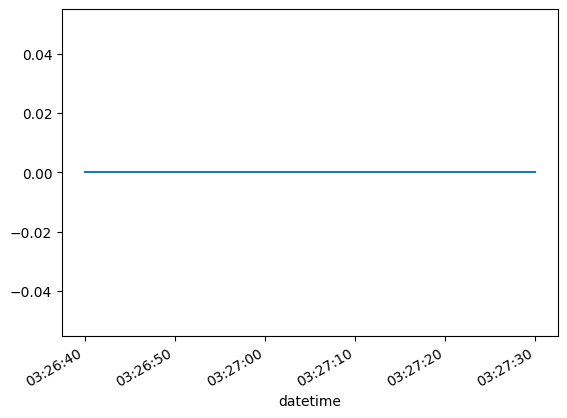

In [199]:
# This is a serious problem, as it may not happen fluctuate at every seconds.
dfs[20].set_index('datetime')['Personal Thermal Assessment'][:100].plot()

In [200]:
# Metigate the issues using backfill technique
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop_duplicates(['datetime'] ).set_index('datetime').resample('1s').bfill()

<Axes: xlabel='datetime'>

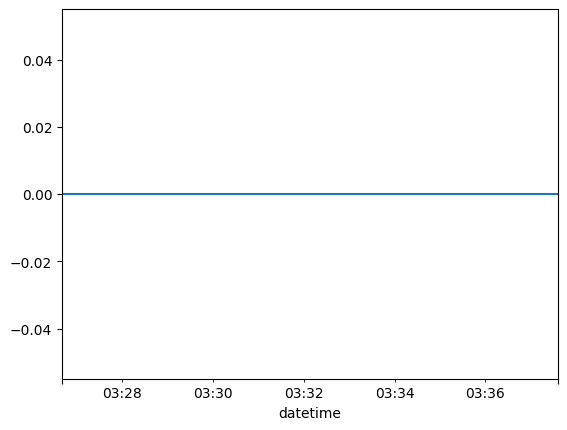

In [201]:
dfs[20]['Personal Thermal Assessment'].plot()

In [202]:
test = pd.concat(dfs)
test

,id,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,...,Personal Thermal Assessment,Age,X_axis,Y_axis,Z_axis,Task,Room Color,Thermal sensation,Gender,diff
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-27 02:41:58+00:00,1,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,120.0,...,0,20,-36.37500,-27.93750,45.78125,0,2,0,0,0 days 00:00:01
2021-07-27 02:41:59+00:00,1,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,120.0,...,0,20,-41.34375,-36.59375,37.37500,0,2,0,0,0 days 00:00:01
2021-07-27 02:42:00+00:00,1,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,120.0,...,0,20,-32.15625,-39.40625,41.15625,0,2,0,0,0 days 00:00:01
2021-07-27 02:42:01+00:00,1,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,120.0,...,0,20,-26.43750,-38.56250,44.53125,0,2,0,0,0 days 00:00:01
2021-07-27 02:42:02+00:00,1,147,773.596939,718.750,1000.000,284.341250,284.342539,86.0,58.503401,121.0,...,0,20,-35.65625,-33.68750,42.09375,0,2,0,0,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 04:45:48+00:00,1,81,946.759259,921.875,1296.875,342.944224,342.945614,63.0,77.777778,72.0,...,0,20,-45.65625,-44.71875,-16.68750,2,1,2,1,0 days 00:00:01
2021-07-28 04:45:49+00:00,1,81,946.759259,921.875,1296.875,342.944224,342.945614,63.0,77.777778,72.0,...,0,20,-42.68750,-45.37500,0.21875,2,1,2,1,0 days 00:00:01
2021-07-28 04:45:50+00:00,1,82,945.503049,921.875,1296.875,340.323047,340.330920,63.0,76.829268,73.0,...,0,20,-55.15625,-32.96875,-0.71875,2,1,2,1,0 days 00:00:01


In [203]:
# Store training data for features extraction
df.to_pickle('/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Test/test.pkl', compression='gzip')

In [204]:
'subject' in df.columns

False

### Features Extraction

In [205]:
train = pd.read_pickle("/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Train/train.pkl", compression= 'gzip')
test = pd.read_pickle("/content/drive/MyDrive/Competition/2023/HeatStroke/Generated/Test/test.pkl", compression='gzip')
train.shape, test.shape

((81214, 69), (35697, 68))

In [206]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
# train.drop(['experiment'], axis=1, inplace=True)
train.columns

Index(['id', 'datetime', 'num_ibis', 'hrv_mean_nni', 'hrv_median_nni',
       'hrv_range_nni', 'hrv_sdsd', 'hrv_rmssd', 'hrv_nni_50', 'hrv_pnni_50',
       'hrv_nni_20', 'hrv_pnni_20', 'hrv_cvsd', 'hrv_sdnn', 'hrv_cvnni',
       'hrv_mean_hr', 'hrv_min_hr', 'hrv_max_hr', 'hrv_std_hr',
       'hrv_total_power', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_lf_hf_ratio',
       'hrv_lfnu', 'hrv_hfnu', 'hrv_SD1', 'hrv_SD2', 'hrv_SD2SD1', 'hrv_CSI',
       'hrv_CVI', 'hrv_CSI_Modified', 'hrv_mean', 'hrv_std', 'hrv_min',
       'hrv_max', 'hrv_ptp', 'hrv_sum', 'hrv_energy', 'hrv_skewness',
       'hrv_kurtosis', 'hrv_peaks', 'hrv_rms', 'hrv_lineintegral',
       'hrv_n_above_mean', 'hrv_n_below_mean', 'hrv_n_sign_changes', 'hrv_iqr',
       'hrv_iqr_5_95', 'hrv_pct_5', 'hrv_pct_95', 'hrv_entropy',
       'hrv_perm_entropy', 'hrv_svd_entropy', 'Temperature', 'Humidity', 'PMV',
       'PDD', 'Age', 'X_axis', 'Y_axis', 'Z_axis', 'subject', 'Task',
       'Room Color', 'Thermal sensation', 'Personal Ther

In [207]:
# Extract the features
for df in [train, test]:
    df['day'] = df.datetime.apply(lambda x: x.day)
    df['weekday'] = df.datetime.apply(lambda x: x.weekday())
    df['hour'] = df.datetime.apply(lambda x: x.hour)
    df['minute'] = df.datetime.apply(lambda x: x.minute)
train.shape, test.shape

((81214, 73), (35697, 72))

In [208]:
'subject' in train.columns

True

### Train the model

####Prepare Datasets

In [155]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [150]:
y_train = train['Personal Thermal Assessment']
x_train = train.drop(['id', 'Personal Thermal Assessment', 'datetime', 'diff', 'subject'], axis = 1)

In [151]:
x_test = test[x_train.columns]
x_test.shape

(35697, 68)

In [152]:
test

,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,Z_axis,Task,Room Color,Thermal sensation,Gender,diff,day,weekday,hour,minute
0,1,2021-07-27 02:41:58+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,45.78125,0,2,0,0,0 days 00:00:01,27,1,2,41
1,1,2021-07-27 02:41:59+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,37.37500,0,2,0,0,0 days 00:00:01,27,1,2,41
2,1,2021-07-27 02:42:00+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,41.15625,0,2,0,0,0 days 00:00:01,27,1,2,42
3,1,2021-07-27 02:42:01+00:00,147,772.852891,718.750,1000.000,282.021806,282.030761,85.0,57.823129,...,44.53125,0,2,0,0,0 days 00:00:01,27,1,2,42
4,1,2021-07-27 02:42:02+00:00,147,773.596939,718.750,1000.000,284.341250,284.342539,86.0,58.503401,...,42.09375,0,2,0,0,0 days 00:00:01,27,1,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35692,1,2021-07-28 04:45:49+00:00,81,946.759259,921.875,1296.875,342.944224,342.945614,63.0,77.777778,...,0.21875,2,1,2,1,0 days 00:00:01,28,2,4,45
35693,1,2021-07-28 04:45:50+00:00,82,945.503049,921.875,1296.875,340.323047,340.330920,63.0,76.829268,...,-0.71875,2,1,2,1,0 days 00:00:01,28,2,4,45
35694,1,2021-07-28 04:45:51+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,-14.96875,2,1,2,1,0 days 00:00:01,28,2,4,45
35695,1,2021-07-28 04:45:52+00:00,82,944.359756,921.875,1296.875,340.131102,340.131594,63.0,76.829268,...,-19.96875,2,1,2,1,0 days 00:00:01,28,2,4,45


In [153]:
x_train, x_test, y_train = x_train.values, x_test.values, y_train.values


#### KFold CV

In [32]:
# KFold CV
kfold = StratifiedKFold(n_splits=5)

In [42]:
#RFC
rfc_acc = []
rfc = RandomForestClassifier()
for train_ix, val_ix in kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_ix], x_train[val_ix]
    y_train_fold, y_val_fold = y_train[train_ix], y_train[val_ix]

    rfc.fit(x_train_fold, y_train_fold)
    rfc_acc.append(rfc.score(x_val_fold, y_val_fold))

In [43]:
#AdaBoost
ada_acc = []
ada = AdaBoostClassifier()
for train_ix, val_ix in kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_ix], x_train[val_ix]
    y_train_fold, y_val_fold = y_train[train_ix], y_train[val_ix]

    ada.fit(x_train_fold, y_train_fold)
    ada_acc.append(ada.score(x_val_fold, y_val_fold))

In [44]:
#SVM
svm_acc = []
svm = SVC()
for train_ix, val_ix in kfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_ix], x_train[val_ix]
    y_train_fold, y_val_fold = y_train[train_ix], y_train[val_ix]

    svm.fit(x_train_fold, y_train_fold)
    svm_acc.append(svm.score(x_val_fold, y_val_fold))

KeyboardInterrupt: ignored

#### Leave-one-person-out CV

In [ ]:
y_train = train['Personal Thermal Assessment']
x_train = train.drop(['id', 'Personal Thermal Assessment', 'datetime', 'diff'], axis = 1)
x_train.shape, y_train.shape

((81214, 69), (81214,))

In [ ]:
'subject' in x_train.columns

True

In [ ]:
# RFC Leave-one-out
rfc = RandomForestClassifier()
rfc_acc_loo = []
for sub in train.subject.unique():
    x_train_fold = x_train[train.subject!=sub].drop(['subject'], axis=1).values
    x_val_fold = x_train[train.subject==sub].drop(['subject'], axis=1).values

    y_train_fold = y_train[train.subject!=sub].values
    y_val_fold = y_train[train.subject==sub].values

    rfc.fit(x_train_fold, y_train_fold)
    rfc_acc_loo.append(rfc.score(x_val_fold, y_val_fold))

In [ ]:
# AdaBoost Leave-one-out
ada = AdaBoostClassifier()
ada_acc_loo = []
for sub in train.subject.unique():
    x_train_fold = x_train[train.subject!=sub].drop(['subject'], axis=1).values
    x_val_fold = x_train[train.subject==sub].drop(['subject'], axis=1).values

    y_train_fold = y_train[train.subject!=sub].values
    y_val_fold = y_train[train.subject==sub].values

    ada.fit(x_train_fold, y_train_fold)
    ada_acc_loo.append(ada.score(x_val_fold, y_val_fold))

In [ ]:
# SVM Leave-one-out
svm = SVC()
svm_acc_loo = []
for sub in train.subject.unique():
    x_train_fold = x_train[train.subject!=sub].drop(['subject'], axis=1).values
    x_val_fold = x_train[train.subject==sub].drop(['subject'], axis=1).values

    y_train_fold = y_train[train.subject!=sub].values
    y_val_fold = y_train[train.subject==sub].values

    svm.fit(x_train_fold, y_train_fold)
    svm_acc_loo.append(svm.score(x_val_fold, y_val_fold))

#### GridSearchCV

In [ ]:
# RFC
rfc = RandomForestClassifier()
params_grid_rfc = {
    "n_estimators":[50, 100, 500, 1000],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [20, 40, None],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "class_weight": ["balanced", "balanced_subsample"]
    }
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = params_grid_rfc, refit = True, cv = 5, verbose = 2, n_jobs = -1)
grid_search_rfc.fit(x_train, y_train)

In [ ]:
# AdaBoost
ada = AdaBoostClassifier()
params_grid_ada = {
    "estimator":[None, RandomForestClassifier()],
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.1, 0.5, 1, 5, 10],
    "algorithm": ["SAMME", "SAMME.R"]
    }
grid_search_ada = GridSearchCV(estimator = ada, param_grid = params_grid_ada, refit = True, cv = 5, verbose = 2, n_jobs = -1)
grid_search_ada.fit(x_train, y_train)

In [ ]:
# SVM
svm = SVC()
params_grid_svm = {
    "C": [0.1, 1, 5, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
    "degree": [2, 3, 5, 10],
    "gamma": ["scale", "auto"],
    "class_weight": ["balanced", None]
    }
grid_search_svm = GridSearchCV(estimator = svm, param_grid = params_grid_svm, refit = True, cv = 5, verbose = 2, n_jobs = -1)
grid_search_svm.fit(x_train, y_train)

#### Model Ensemble

In [ ]:
ensemble = VotingClassifier(
    estimators = [("rfc", rfc), ("ada", ada), ("svm", svm)],
    voting = "soft",
    n_jobs = -1,
    verbose = True
    )
ensemble.fit(x_train, y_train)

####Performance Metrics

In [156]:
#class-wise accuracy
class_name = LE['Personal Thermal Assessment'].inverse_transform([0, 1, 2, 3, 4])
y_pred = ensemble.predict(x_train)
print(classification_report(y_train, y_pred, target_names = class_name, digits=4))

               precision    recall  f1-score   support

          hot     1.0000    0.9772    0.9885      4658
      neutral     0.9836    1.0000    0.9917     47159
slightly warm     1.0000    0.9750    0.9873     18090
     very hot     1.0000    1.0000    1.0000      2285
         warm     1.0000    0.9747    0.9872      9022

     accuracy                         0.9903     81214
    macro avg     0.9967    0.9854    0.9910     81214
 weighted avg     0.9905    0.9903    0.9903     81214



### Generate Submission File

In [181]:
test_output = ensemble.predict(x_test)
test_output

array([0, 1, 1, ..., 1, 1, 1])

In [213]:
test = pd.read_csv(DIR + 'Test/Test Data.csv')
test.head()

,id,datetime,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,...,Humidity,PMV,PDD,Thermal sensation,Personal Thermal Assessment,Gender,Age,X_axis,Y_axis,Z_axis
0,1,2021-07-27 05:14:00+00:00,128,868.896484,890.6250,1265.625,237.883171,237.900001,81.0,63.281250,...,60,0.66,14.3,slightly warm,0,M,20,-37.18750,46.09375,21.53125
1,1,2021-07-27 05:14:01+00:00,128,871.337891,898.4375,1265.625,237.444476,237.447058,80.0,62.500000,...,60,0.66,14.3,slightly warm,0,M,20,-37.53125,46.00000,21.31250
2,1,2021-07-27 05:14:02+00:00,128,872.070312,906.2500,1265.625,237.224187,237.224314,79.0,61.718750,...,60,0.66,14.3,slightly warm,0,M,20,-37.28125,46.00000,21.21875
3,1,2021-07-27 05:14:03+00:00,129,872.698643,906.2500,1265.625,236.332129,236.332160,79.0,61.240310,...,60,0.66,14.3,slightly warm,0,M,20,-37.43750,45.87500,21.68750
4,1,2021-07-27 05:14:04+00:00,130,873.197115,906.2500,1265.625,235.418382,235.418382,79.0,60.769231,...,60,0.66,14.3,slightly warm,0,M,20,-37.93750,45.93750,21.25000


In [216]:
submission  = pd.DataFrame()
submission['timestamp'] = test.datetime
submission['subject'] = test.subject
submission['Personal Thermal Assessment'] = LE['Personal Thermal Assessment'].inverse_transform(test_output)
submission

,timestamp,subject,Personal Thermal Assessment
0,2021-07-27 05:14:00+00:00,Matuo,hot
1,2021-07-27 05:14:01+00:00,Matuo,neutral
2,2021-07-27 05:14:02+00:00,Matuo,neutral
3,2021-07-27 05:14:03+00:00,Matuo,hot
4,2021-07-27 05:14:04+00:00,Matuo,hot
...,...,...,...
35692,2021-07-28 03:19:54+00:00,Yuke,neutral
35693,2021-07-28 03:19:55+00:00,Yuke,neutral
35694,2021-07-28 03:19:56+00:00,Yuke,neutral
35695,2021-07-28 03:19:57+00:00,Yuke,neutral


In [217]:
submission.to_csv('/content/drive/MyDrive/Competition/2023/HeatStroke/Submission/new submission.csv', index = False)
